# Smoking Gun? : Re-examining the relationship between FBI background checks and state-level census data  

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#tools">Tools</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this report, I will be exploring what census data tells us about gun purchases across the US. The gun data comes from from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The state level cenus data comes from [census.gov](https://www.census.gov).   

I downloaded the NICS data in .xlxs format from the [Udacity project site](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True) and used Excel to save it as a csv file so that I could use pandas to manipulate it. The census data was already in .csv format so this step was unneccesary. I combined the two files to one csv to make working with them easier.

For this project, I wanted to answer the questions that are listed below:
<ol>
    <li> Which kinds of guns are people applying permits for? </li>
    <li> How does redemption data compare between the types of firearms overall? </li>
    <li> How does the percentage of people with Bachelor's degree affect permit applications? </li>
    <li> To Shoot or to Build: Comparing Business permits vs Firearm permits </li>
    <li> Which states have had the highest growth in gun registrations? </li>
</ol>

<a id='tools'></a>
## Tools

I used pandas and numpy to make working with the .csv's easier and more efficient. I also used matplotlib to plot graphs showing the relationships between the various variables and added seaborn to make the graphs visually appealing. All plots appeared inline to make working with the data quick and presentable in report form.

In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I loaded in the data from the csv documents, checked for cleanliness, and then trimmed and cleaned the dataset for analysis. Cleaning decisions I made are explained in the cells adjacent to the code. 

### General Properties of the dataset

In [2]:
#Read in the csv files
census_data = pd.read_csv('census.csv') 
gun_data = pd.read_csv('gun_data.csv')

In [3]:
#Print out first rows of data frame to make sure the data was read in correctly
census_data.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,4863300,741894,6931071,2988248,39250017,5540545,3576452,952065,...,865454,6651194,27862596,3051217,624594,8411808,7288000,1831102,5778708,585501
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [4]:
gun_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [5]:
#What does the data look like
census_data.shape

(85, 52)

In [6]:
gun_data.shape

(12485, 27)

In [7]:
#What are the summary statistics
census_data.describe();
gun_data.describe();

### Data Cleaning 

In [8]:
#Drop columns in gun_data that aren't relevant to the questions I am trying to answer and print head to confirm that drop happened
gun_data.drop(['permit_recheck', 'multiple','admin','prepawn_handgun','prepawn_long_gun','prepawn_other','redemption_other','returned_handgun','returned_long_gun','returned_other','rentals_handgun','rentals_long_gun','private_sale_handgun','private_sale_long_gun','private_sale_other','return_to_seller_handgun','return_to_seller_long_gun','return_to_seller_other','totals'], axis=1, inplace=True)


In [9]:
gun_data.head() #Confirm that data was successfully dropped

,month,state,permit,handgun,long_gun,other,redemption_handgun,redemption_long_gun
0,2017-09,Alabama,16717.0,5734.0,6320.0,221.0,1378.0,1262.0
1,2017-09,Alaska,209.0,2320.0,2930.0,219.0,200.0,154.0
2,2017-09,Arizona,5069.0,11063.0,7946.0,920.0,1474.0,748.0
3,2017-09,Arkansas,2935.0,4347.0,6063.0,165.0,1296.0,1824.0
4,2017-09,California,57839.0,37165.0,24581.0,2984.0,535.0,397.0


In [117]:
gun_data['month'] = pd.to_datetime(gun_data['month']) #Convert month to datetime object

In [10]:
#Drop columns in census that aren't relevant to my questions
census_data.drop(['Fact Note'] ,axis=1, inplace=True) # Drop the Fact Note Column since I don't need it

In [11]:
census_data.head() # Check that Fact Note was indeed dropped
census_data.set_index('Fact', inplace=True) #Reset Index to Fact

In [12]:
#Make tuple of rows I want to keep for comparison
census_data_list = census_data.iloc[0],census_data.iloc[29],census_data.iloc[35],census_data.iloc[47] 
census_data_list = pd.DataFrame (list(census_data_list)) # Convert tuple to dataframe 

In [64]:
#Output the resulting dataframe to check that desired columns remained
census_data_list.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
"Population estimates, July 1, 2016, (V2016)",4863300,741894,6931071,2988248,39250017,5540545,3576452,952065,20612439,10310371,...,865454,6651194,27862596,3051217,624594,8411808,7288000,1831102,5778708,585501
"Building permits, 2016",15001,1503,35578,9474,102350,38974,5504,5804,116240,51675,...,5686,36157,165853,22662,1771,31132,44077,2544,19274,1727
"Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015",0.235,0.28,0.275,0.211,0.314,0.381,0.376,0.3,0.273,0.288,...,0.27,0.249,0.276,0.311,0.36,0.363,0.329,0.192,0.278,0.257
"Median household income (in 2015 dollars), 2011-2015",43623,72515,50255,41371,61818,60629,70331,60509,47507,49620,...,50957,45219,53207,60727,55176,65015,61062,41751,53357,58840


In [65]:
# Transpose dataframe so that we can easily compare dataframes with the gun_data dataframe 
# since state data will now be in the first column 
census_data_list = census_data_list.transpose()
census_data_list.head() 

,"Population estimates, July 1, 2016, (V2016)","Building permits, 2016","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015"
Alabama,4863300,15001,0.235,43623
Alaska,741894,1503,0.28,72515
Arizona,6931071,35578,0.275,50255
Arkansas,2988248,9474,0.211,41371
California,39250017,102350,0.314,61818


In [20]:
#Check shape to make sure all 50 states show up in our dataframe
census_data_list.shape

(50, 4)

<a id='eda'></a>
## Exploratory Data Analysis

Now that the data is trimmed and cleaned, I move on to the exploration. In the following section, I compute statistics and create visualizations to address the research questions posed in the Introduction section.


### What kinds of guns are people applying permits for?

In [121]:
#I get the specific columns for hand guns and long guns from the gun_data dataframe
perm_h = gun_data.iloc[:,3] #handguns
perm_l = gun_data.iloc[:,4] #long_guns
z_time = gun_data.iloc[:,0] #time variable

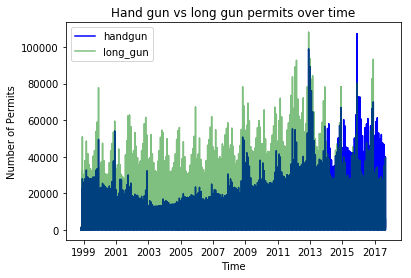

In [124]:
#I make a plot of hand_guns over time and long_guns over time on the same graph to compare the trend
first = plt.plot(z_time,perm_h, color = 'blue') #handguns vs permits for each state
second = plt.plot(z_time,perm_l, color='green', alpha =0.5) #long_guns vs permits for each state
plt.ylabel('Number of Permits')
plt.title('Hand gun vs long gun permits over time')
plt.xlabel('Time')
plt.legend()
plt.show()

From the mixed plot above, we can see that the permits for both guns appear to be cyclical. This could be partly explained by the seasonality of most of the regions. As an example, most people would not be using guns outside during the winter or outside of hunting season. People would still be purchasing firearms for protection or indoor shooting, so the rate would not fall to zero. On average, it appears that most people in the different states are applying for more permits to own long guns than they do for regular hand guns. The general trend for permit applications appears to be increasing for both types of firearms.

### How does redemption data compare between the types of firearms overall?

In [24]:
#Select hand guns and long guns columns from dataframe
red_h = gun_data.iloc[:,6] #redemption_handgun
red_l = gun_data.iloc[:,3] #redemption longgun

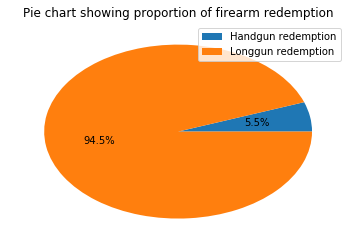

In [29]:
#PLot a pie chart to show the distribution
data = [red_h.sum(),red_l.sum()]
labels = 'Handgun redemption', 'Longgun redemption'
plt.pie(data, autopct='%1.1f%%')
plt.legend(labels, loc=0)
plt.axis = ('equal')
plt.title('Pie chart showing proportion of firearm redemption')
plt.show()

More people redeem long guns than they do handguns which is inline with  the type of permits they are applying for as we saw in the previous question. There appears to be an overwhelming amount of longgun redemption so we might want to look at the data and see why this number is so disproportional.  

### How does the percentage of people with Bachelor's degree affect permit applications?

The data from the gun_file has data for multiple years but the census data file only has a snapshot from certain timeperiods, I will take the population estimates from 2016 and compare that with gun data for the average of 2016 data

In [30]:
#Mean gun data of 2016 to compare with 2016 Census data
m_2df = pd.to_datetime(gun_data['month']); #month to dataframe
gun_data['year'] = m_2df.dt.year #make year column
x = gun_data.loc[gun_data['year'] == 2016]; # Get 2016 data
gun_summary_df = x.groupby('state').mean(); # Mean of 2016 data by state
gun_summary_df.head()

,permit,handgun,long_gun,other,redemption_handgun,redemption_long_gun,year
state,,,,,,,
Alabama,24253.250000,12760.250000,10163.583333,508.666667,1669.666667,1474.750000,2016
Alaska,260.083333,3124.250000,3073.916667,240.750000,186.166667,170.500000,2016
Arizona,7314.250000,13898.666667,9082.333333,1093.500000,1381.333333,699.166667,2016
Arkansas,4621.333333,6687.000000,6843.333333,254.916667,1053.750000,1711.000000,2016
California,86415.083333,46696.250000,46212.500000,17642.250000,562.666667,553.750000,2016


In [31]:
#Merge the gun_data dataframe with the census_data_list dataframe and output to confirm merge
perm_df = pd.DataFrame(gun_summary_df['permit']);
summary_df = census_data_list.join(perm_df);
summary_df.head()

,"Population estimates, July 1, 2016, (V2016)","Building permits, 2016","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015",permit
Alabama,4863300,15001,0.235,43623,24253.250000
Alaska,741894,1503,0.28,72515,260.083333
Arizona,6931071,35578,0.275,50255,7314.250000
Arkansas,2988248,9474,0.211,41371,4621.333333
California,39250017,102350,0.314,61818,86415.083333


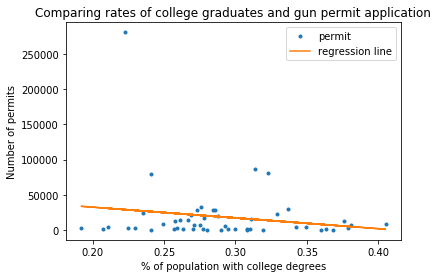

In [34]:
#Plot percentage college degrees and above vs permit applications in states
x = summary_df.iloc[:,2] # College Degrees
x = pd.to_numeric(x) #Convert column from object to numeric so that I can plot it
y = summary_df.iloc[:,4]; #Permit

#Line of best fit with np.ployfit to see relationship
m, b = np.polyfit(x, y, 1)

plt.plot(x, y, '.', label='permit')
plt.plot(x, m*x +b, '-', label='regression line')

plt.ylabel('Number of permits')
plt.xlabel('% of population with college degrees')
plt.legend(loc=1)
plt.title('Comparing rates of college graduates and gun permit application')
plt.show();

From the plot, it appears that as there is a slight negative correlation between the percentage of people with college degrees and the permit applications in states. States with a higher percentage of college graduates appear to apply for a lower number of permits. It appears that there is an outlier state that has a high number of permit applications even though its proportion of college graduates to that of the general population is low.

### To Shoot or to Build: Comparing Business permits vs Firearm permits

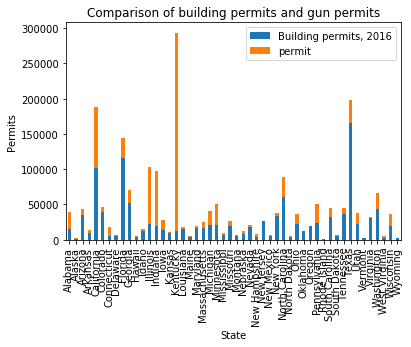

In [186]:
stack_comp = summary_df[['Building permits, 2016','permit']].plot(kind='bar', stacked=True);
stack_comp.set_xlabel('State');
stack_comp.set_ylabel('Permits');
stack_comp.set_title('Comparison of building permits and gun permits');


Text(0.5,1,'Comparing the types of permits by total amounts')

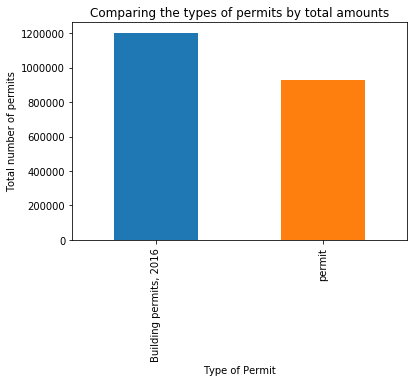

In [191]:
combined_bar = summary_df[['Building permits, 2016','permit']].sum().plot(kind='bar', stacked=True);
combined_bar.set_xlabel('Type of Permit');
combined_bar.set_ylabel('Total number of permits');
combined_bar.set_title('Comparing the types of permits by total amounts');

From the above graphs, it is clear that building permits in most states edge out gun permits but not by a large amount. In fact, it is interesting to note that in a couple of states like Kentucky, the number of gun permits far outnumber those of building permits

### Which states have had the highest growth in gun registrations?

For this question, I will look at the average data from 2010 and compare it with that from 2017

In [294]:
#Relationship between states and gun permits over time
x = gun_data.groupby(['state'])
#hand guns vs long guns vs other guns in the states. Here I define the variables
m_2df = pd.to_datetime(gun_data['month']); #month to dataframe
gun_data['year'] = m_2df.dt.year #make year column
x = gun_data.loc[gun_data['year'] == 2012]; # Get 2012 data
gun_summary_df = x.groupby('state').mean(); # Mean of 2012 data by state
perm_2012 = pd.DataFrame(gun_summary_df['permit'])


In [320]:
y = gun_data.loc[gun_data['year'] == 2017];
gun_summary_df = y.groupby('state').mean(); # Mean of 2017 data by state
perm_2017 = pd.DataFrame(gun_summary_df['permit']);

In [363]:
twodf = perm_2017
twodf = twodf.join(perm_2012)
twodf.columns = ['2017 Permit Data', '2012 Permit Data']
twodf['% Growth'] = (twodf['2017 Permit Data'] - twodf['2012 Permit Data']) / ((twodf['2012 Permit Data']+0.01)*100)
twodf.sort_values('% Growth', ascending=False).head()

,2017 Permit Data,2012 Permit Data,% Growth
state,,,
Ohio,12165.888889,0.0,12165.888889
Louisiana,2615.111111,0.0,2615.111111
South Dakota,1261.666667,0.0,1261.666667
Virginia,1011.888889,0.0,1011.888889
Maine,721.555556,0.0,721.555556


The top five states that had the highest growth in gun registration were: 
    <ol>
        <li>Ohio</li>
        <li>Louisiana</li>
        <li>South Dakota</li>
        <li>Virginia</li>
        <li>Maine</li>
    </ol>
The 2012 permit data from these states is at zero suggesting that there might have been a backlog of processing data that caused this. It could also indicate that there was input error in the data since having no permits in a year does seem like an aberration.

<a id='conclusions'></a>
## Conclusions

In conclusion, we were able to answer the questions posed at the introduction of this report albeit with some limitations. We found out that people are applying for long guns over handguns although that trend has minimally shifted recently with people seemingly preferring handguns. This could lead to an interesting discussion when it comes to manufacture and selling of the different types of weapons. People redeem more long guns over hand guns which again is congruent with our finding from the first question. It appears there is a slightly negative correlation between number of permits applied for and the percentage of people in those states with a college degree or above. 

Finally we can see that from 2017 data, Ohio has had the most growth in number of permit applications in the 5 year span between 2012 and 2017.

I encountered a couple of limitations when doing my analysis. One was that I lacked a robust dataset of population data since the census only takes place every ten years and I was working population estimates from 2016 to make my comparisons between the FBI database and the census database. A second issue I faced had to do with missing data points. When analysing the last question on states with the highest growth in permit applications, I found a lot of states that reported no permit applications. This seems strange and should warrant further investigation from the data source to ensure that integrity of the data we are working with is not being compromised since the lack of reported data in this section could cast doubt on the analysis conducted herein.